#Introduction and Objective



---
# Case Study
---



---

Bank Mandiri ingin meninjau lebih jauh mengenai tanggapan pengguna terkait aplikasi terupdate mereka. Di mana saya sebagai data scientist ditugaskan untuk meninjau tanggapan pelanggan dari playstore dan membantu untuk meninjau bagaimana karakter dari review yang baik dan buruk. Dengan demikian, saya mengembangkan model yang dapat mengklasifikasikan ulasan menjadi kategori positif dan negatif berdasarkan teks ulasan yang diberikan. Model ini akan membantu bank dalam memahami pandangan pengguna terhadap aplikasi mereka, serta memberikan wawasan berharga untuk perbaikan dan pengembangan aplikasi berdasarkan umpan balik pengguna

---




# Instalation and Import Library

In [1]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.7 MB/s eta 0:00:00


In [2]:
!pip install nltk --upgrade

In [3]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.9 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install keras

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
import pickle
import contractions
import os
import string
import re
import nltk
import keras



# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization, Embedding
from contractions import contractions_dict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from collections import Counter


import warnings
warnings.filterwarnings(action='ignore')

#Data Loading and Overview

Pada kasus ini, dataset yang saya gunakan merupakan review berbahasa indonesia dari aplikasi livin mandiri. Untuk mempermudah dalam pengerjaan proyek ini, dan mengetahui dari berbagai kasus bahwa beberapa model NLP lebih banyak digunakan untuk mendeteksi bahasa inggris, serta juga saya ingin menggunakan pustaka nltk yang sudah memiliki banyak fungsi dalam berbahasa inggris yang bisa digunakan untuk mempermudah proses NLP, sehingga, saya melakukan penerjemahan dari dataset awal saya menjadi bahasa inggris.

Di mana pada proyek ini, alat penerjemah yang saya gunakan adalah google translate, yang saya lakukan di luar notebook pada website google translate langsung untuk mempercepat proses penerjemahan.

In [6]:
#menyimpan dataset awal ke dalam variabel df
df = pd.read_excel('/content/livin_mandiri_reviews.xlsx')

In [7]:
#menyimpan dataset hasil terjemahan ke dalam variabel df_trans
df_trans = pd.read_excel('/content/livin_mandiri_review_trans.xlsx')

In [8]:
df

,date,review,rating,thumbs_up,version
0,2021-09-30 06:12:53,"Udah di coba, keren dan responsive, dengan tam...",5,36,1.0.0
1,2021-09-30 06:33:15,Excellent,5,0,1.0.0
2,2021-09-30 06:48:30,Keren. Cakep benar semakin canggih. Terdepan t...,5,22,1.0.0
3,2021-09-30 06:56:05,mantap,5,0,NaN
4,2021-09-30 07:02:21,Mantap,5,0,1.0.0
...,...,...,...,...,...
155187,2022-12-24 04:04:31,Mantap pokoke,5,0,NaN
155188,2022-12-24 04:05:17,Sejak di update livin saya susah dibuka. Setia...,1,0,1.2.0
155189,2022-12-24 04:13:18,"Kartu atm saya hilang,ini bagai mana cara gant...",4,0,1.2.0
155190,2022-12-24 04:17:13,Sudah di donwload tidak berhasil,1,0,NaN


In [9]:
#melihat nama kolom
df.columns

Index(['date', 'review', 'rating', 'thumbs_up', 'version'], dtype='object')

In [10]:
df_trans

,Unnamed: 0,date,reviews,ratings,thumbs_up,version,date
0,0,2021-09-30 06:12:53,"I've tried it, it's cool and responsive, with...",5,36,1.0.0,NaN
1,1,2021-09-30 06:33:15,Excellent,5,0,1.0.0,NaN
2,2,2021-09-30 06:48:30,Cool. Saucy is really getting more sophistica...,5,22,1.0.0,NaN
3,3,2021-09-30 06:56:05,Excellent,5,0,NaN,NaN
4,4,2021-09-30 07:02:21,Excellent,5,0,1.0.0,NaN
...,...,...,...,...,...,...,...
155187,155187,2022-12-24 04:04:31,That's great,5,0,NaN,NaN
155188,155188,2022-12-24 04:05:17,Since I updated livin it's hard to open. Ever...,1,0,1.2.0,NaN
155189,155189,2022-12-24 04:13:18,"My atm card is lost, how do you replace the a...",4,0,1.2.0,NaN
155190,155190,2022-12-24 04:17:13,It's been downloaded but it didn't work,1,0,NaN,NaN


In [11]:
#melihat nama kolom
df_trans.columns

Index(['Unnamed: 0', 'date', ' reviews', ' ratings', ' thumbs_up', ' version',
       ' date'],
      dtype='object')

In [12]:
#membandingkan teks asli dan hasil terjemahan
print('asli :', df['review'][155188])
print('terjemahan :', df_trans[' reviews'][155188])

asli : Sejak di update livin saya susah dibuka. Setiap diklik langsung keluar otomatis. Jdi saya harus uninstall dlu dan install kembali setiap mau transaksi. Buang waktu dan buang kuota. Mohon utk diperbaiki aplikasi livinnya. Kalau seperti ini bkn mempermudah transaksi tpi mmprsulit apalagi kalau sdng ada transaksi yg mendesak.
terjemahan :  Since I updated livin it's hard to open. Every time you click it automatically exits. So I have to uninstall first and reinstall every time I want to make a transaction. Waste of time and waste of quota. Please fix the livin application. If it's like this, it won't make transactions easier, but it will make it more difficult, especially if there are urgent transactions.


# Exploratory Data Analysis (Before preprocess)

Pada section ini saya melakukan sedikit eksplorasi data untuk mendapat informasi awal dari dataset

In [13]:
#menghapus spasi di nama kolom df_trans
df_trans.columns = df_trans.columns.str.strip()

In [14]:
#menyimpan copy df_trans ke df_eda1
df_eda1 = df_trans.copy()

In [15]:
#melihat nama kolom
df_eda1.columns

Index(['Unnamed: 0', 'date', 'reviews', 'ratings', 'thumbs_up', 'version',
       'date'],
      dtype='object')

In [16]:
#menghapus kolom Unnamed: 0
df_eda1 = df_eda1[['date', 'reviews', 'ratings', 'thumbs_up', 'version']]

In [17]:
#melihat nilai unik dalam kolom
df_eda1.version.value_counts()

 1.0.2    43902
 1.1.0    24789
 1.1.1    18675
 1.0.0    10900
 1.1.3     7083
 1.0.1     6719
 1.1.2     5317
1.2.0      1272
 1.2.0       52
 1.0.3        4
 0.2.5        1
Name: version, dtype: int64

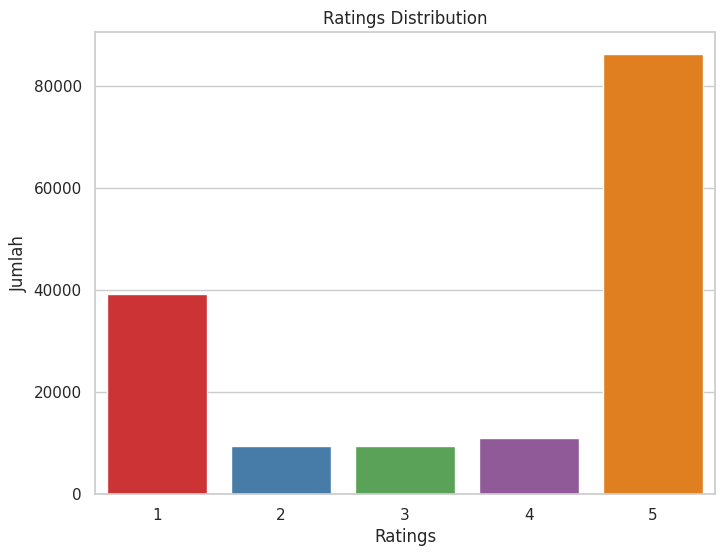

In [18]:
#membuat plot bar untuk kolom ratings
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda1, x='ratings', palette='Set1')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan plot ini, terlihat bahwa pengguna aplikasi cenderung dominan memberikan rating 5 jika bagus, dan rating 1 jika tidak bagus. Hal ini dibuktikan dengan dominasi dari rating 1 dan 5 dibandingkan dengan rating 2,3,4 dari seluruh dataset ini. Hal ini mungkin dapat jadi pertimbangan untuk memberikan 2 atau 3 kategori rating saja untuk dapat menyederhanakan kategori ini, sehingga dapat membuat nilai 1 tidak menjadi arti yang terlalu buruk, karena perilaku pelanggan akan lebih mudah memberikan rating 1 dibandingkan mempertimbangkan untuk menilai 2 atau 3 jika mereka mendapat kesulitan dalam penggunaan aplikasi

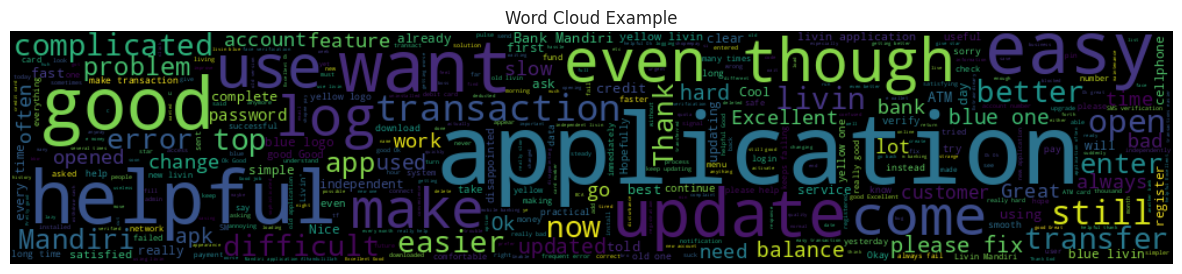

In [19]:
#membuat plot wordcloud
wordcloud = WordCloud(max_words=1500, width=1000, background_color='black').generate(" ".join(df_eda1['reviews']))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud Example")
plt.axis("off")
plt.show()

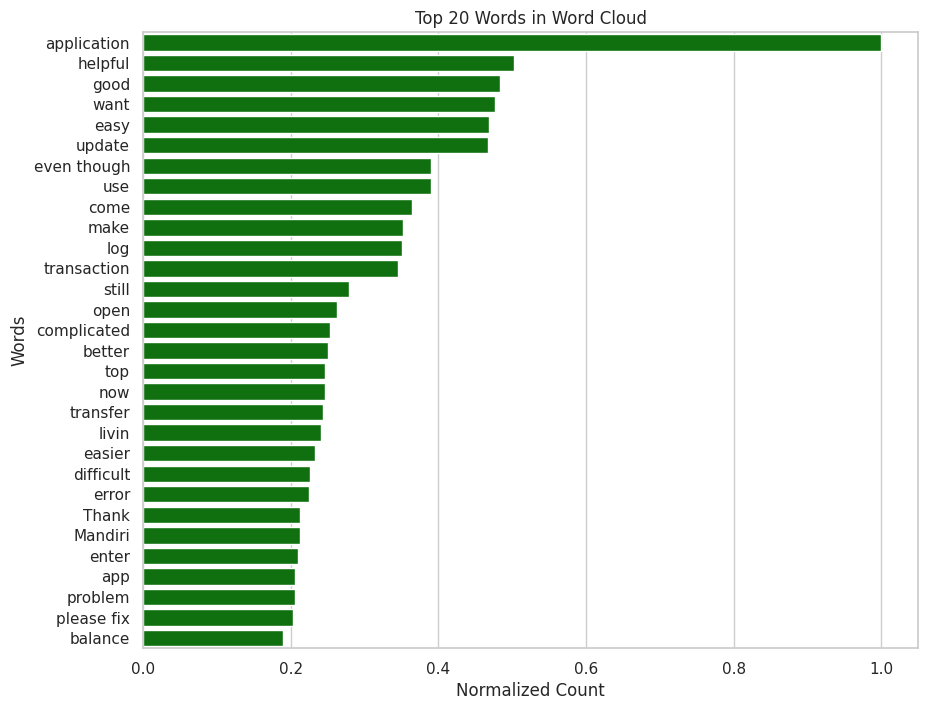

In [20]:
#membuat plot horizontal bar untuk setiap item wordcloud
x = []
y = []
for key,value in wordcloud.words_.items():
    x.append(key)
    y.append(value)
    if len(x) == 30:
        break
plt.figure(figsize=(10, 8))
sns.barplot(x=y, y=x, color='green')  # Membalik x dan y
plt.title("Top 20 Words in Word Cloud")
plt.xlabel("Normalized Count")
plt.ylabel("Words")
plt.show()

Berdasarkan wordcloud dan plot bar dari 30 urutan tertinggi nilai normalized count di atas, terlihat bahwa urutan nilai 5 tertinggi adalah application, helpful, good, want, dan easy. Dari ke-5 kata tertinggi ini, untuk sementara terlihat bahwa lebih banyak kata dengan nuansa positif. Plot ini dapat menjadi informasi awal untuk melihat kata yang terlalu sering disebut, yang cenderung membuatnya menjadi kekurangan makna, dan kata yang tidak terlalu sering disebut namun memiliki makna yang cukup signifikan.

# Text Preprocessing

Berikut adalah langkah-langkah text preprocessing yang saya lakukan:

1. Melakukan ekspansi kontraksi kata
2. Mengubah teks ke lowercase
3. Menghilangkan tanda baca dan karakter yang tidak diperlukan
5. Menghilangkan stopwords
6. Melakukan lematisasi

In [21]:
#mengambil kolom yang diperlukan untuk section selanjutnya ke dalam variabel df_prepro
df_prepro = df_trans[['reviews', 'ratings', 'thumbs_up']]

In [22]:
#melihat missing values
df_prepro.isna().sum()

reviews      0
ratings      0
thumbs_up    0
dtype: int64

In [23]:
df_prepro

,reviews,ratings,thumbs_up
0,"I've tried it, it's cool and responsive, with...",5,36
1,Excellent,5,0
2,Cool. Saucy is really getting more sophistica...,5,22
3,Excellent,5,0
4,Excellent,5,0
...,...,...,...
155187,That's great,5,0
155188,Since I updated livin it's hard to open. Ever...,1,0
155189,"My atm card is lost, how do you replace the a...",4,0
155190,It's been downloaded but it didn't work,1,0


Pada kasus ini saya ingin menghapus kolom tanggal dan version karena kolom tersebut tidak memberikan informasi yang signifikan dan memiliki cukup banyak kolom berisi nan atau missing values.

In [24]:
#melihat salah satu contoh reviews
print(df_prepro['reviews'][100])

 Makes life even younger, whatever, wherever, just always happy, thank you Livin by Mandiri...


## Expanding contractions:

Pada section ini saya melakukan perluasan kontraksi, untuk mengurangi kemungkinan ambiguitas atau kebingungan dalam konteks tertentu dalam istilah-istilah bahasa inggris yang umum memiliki singkatan seperti  'aren’t' menjadi 'are not', ’cause' menjadi 'because', 'can’t' menjadi 'cannot'.

Selain itu, treatment ini juga dapat membantu membakukan teks, membuatnya lebih mudah untuk dibandingkan dan dianalisis di berbagai sumber. Di mana hal ini juga dapat meningkatkan performa model pembelajaran mesin dengan mengurangi jumlah noise atau variabilitas dalam data.

Pada kasus ini saya menggunakan bantuan contractions_dict dari pustaka contractions untuk digunakan sebagai list dictionary.

In [25]:
contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [26]:
#menerapkan perubahan kontraksi ke kolom reviews
df_prepro["reviews"] = df_prepro["reviews"].apply(contractions.fix)

In [27]:
#mereview perbedaan sebelum dan sesudah perubahan
pd.concat([df_trans['reviews'], df_prepro['reviews']], axis=1)

,reviews,reviews
0,"I've tried it, it's cool and responsive, with...","I have tried it, it is cool and responsive, w..."
1,Excellent,Excellent
2,Cool. Saucy is really getting more sophistica...,Cool. Saucy is really getting more sophistica...
3,Excellent,Excellent
4,Excellent,Excellent
...,...,...
155187,That's great,That is great
155188,Since I updated livin it's hard to open. Ever...,Since I updated livin it is hard to open. Eve...
155189,"My atm card is lost, how do you replace the a...","My atm card is lost, how do you replace the a..."
155190,It's been downloaded but it didn't work,It is been downloaded but it did not work


##Lowercase

Pada section ini saya melakukan perubahan dengan mengganti seluruh huruf kapital reviews jadi huruf kecil, untuk beberapa tujuan sebagai berikut:

* Normalisasi: Mengubah semua teks menjadi huruf kecil membantu menormalkan teks, yang berarti variasi berbeda dari kata yang sama akan diperlakukan sebagai token yang sama. Misalnya, jika "Livin" dan "livin" tidak dinormalisasi ke kasus yang sama, mereka akan diperlakukan sebagai token yang berbeda meskipun memiliki arti yang sama.

* Pengurangan Kosakata: Saat saya mengonversi teks menjadi huruf kecil, saya mengurangi ukuran kosakata dengan menciutkan semua varian kata menjadi satu token.

* Sensitivitas Kasus: Dalam kasus ini saya tidak ingin model menjadi sensitif terhadap huruf besar-kecil karena dapat menimbulkan noise yang tidak perlu dalam data. Misalnya, jika saya mencoba mengklasifikasikan dokumen berdasarkan topik, saya mungkin tidak peduli apakah "Livin" menggunakan huruf kapital atau tidak.

* Konsistensi: Mengubah semua teks menjadi huruf kecil membantu memastikan konsistensi dalam data, yang dapat meningkatkan akurasi dan keandalan model NLP. Misalnya, jika beberapa teks menggunakan huruf besar dan beberapa lainnya menggunakan huruf kecil, akan lebih sulit bagi model untuk mengidentifikasi pola dan membuat prediksi yang akurat.

In [28]:
#mengubah seluruh teks review menjadi lowercase
df_prepro['reviews'] = df_prepro['reviews'].str.lower()

In [29]:
#mereview perubahan
pd.concat([df_trans['reviews'], df_prepro['reviews']], axis=1)

,reviews,reviews
0,"I've tried it, it's cool and responsive, with...","i have tried it, it is cool and responsive, w..."
1,Excellent,excellent
2,Cool. Saucy is really getting more sophistica...,cool. saucy is really getting more sophistica...
3,Excellent,excellent
4,Excellent,excellent
...,...,...
155187,That's great,that is great
155188,Since I updated livin it's hard to open. Ever...,since i updated livin it is hard to open. eve...
155189,"My atm card is lost, how do you replace the a...","my atm card is lost, how do you replace the a..."
155190,It's been downloaded but it didn't work,it is been downloaded but it did not work


## Remove punctuations

Pada section ini saya menghapus tanda baca dan karakter-karakter lainnya, dengan alasan sebagai berikut:

* Pengurangan noise: Karakter seperti titik, koma, dan titik koma menambah noise pada data, mempersulit model NLP untuk mengidentifikasi pola dan mengekstrak informasi yang bermakna.

* Tokenisasi: Tanda baca sering digunakan untuk memisahkan kata dan frasa, yang berarti jika menyimpannya dalam teks, mereka akan diperlakukan sebagai token terpisah. Dengan menghapus tanda baca, saya dapat meningkatkan keakuratan tokenisasi dan memastikan bahwa kata-kata diidentifikasi dengan benar sebagai token terpisah.

* Normalisasi: Karakter simbol biasanya tidak informatif dan dapat membuat variabilitas data yang tidak perlu. Sehingga menghapusnya dapat membantu menormalkan teks dan mengurangi jumlah variabilitas dalam data.

* Konsistensi: Mirip dengan mengonversi teks menjadi huruf kecil, menghapus tanda baca dapat membantu memastikan konsistensi dalam data. Dengan menghilangkan tanda baca, kita dapat mengurangi jumlah variasi dari kata atau frasa yang sama dan meningkatkan keakuratan dan keandalan model NLP.

In [30]:
#menghapus puctuations dari teks kolom reviews
df_prepro['reviews'] = df_prepro['reviews'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

## Removing stopwords

Stopwords adalah kata-kata yang dianggap umum atau tidak informatif dan biasanya dihapus dari teks sebelum analisis. Contoh stopword dalam kasus saya ini termasuk "the", "and", "a", "an", "in", "of", dan "to". Berikut adalah alasan saya menghapus stopwords untuk kasus ini:

* Pengurangan noise: Stopwords menambahkan noise ke data dan dapat mempersulit model NLP untuk mengidentifikasi pola yang bermakna dan mengekstrak informasi yang berguna. Dengan menghilangkan stopwords, saya dapat mengurangi jumlah noise pada data dan meningkatkan akurasi model NLP.

* Pengurangan Kosakata: Stopwords biasanya sangat umum, yang berarti sering muncul dalam teks. Menghapus stopwords dapat membantu mengurangi ukuran kosakata dan mempermudah model NLP untuk memproses teks.

* Normalisasi: Stopword biasanya tidak memiliki banyak arti dan dapat menciptakan variabilitas yang tidak perlu dalam data. Sehingga dengan menghapusnya dapat membantu menormalkan teks dan mengurangi jumlah variabilitas dalam data.

* Konsistensi: Juga sama dengan mengonversi teks menjadi huruf kecil dan menghapus tanda baca, menghapus stopwords dapat membantu memastikan konsistensi dalam data. Dengan menghapus stopwords, kita dapat mengurangi jumlah variasi dari kata atau frase yang sama dan meningkatkan keakuratan dan keandalan model NLP.

In [31]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df_prepro['reviews'] = df_prepro['reviews'].apply(lambda x: " ".join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Lemmatization

Pada section ini saya melakukan lematisasi, yaitu mereduksi kata menjadi bentuk dasar atau akarnya, yang dikenal sebagai lemma. Tujuan lemmatisasi adalah mengubah kata menjadi bentuk kanonis atau kamus, yang membantu mengurangi dimensi data dan meningkatkan akurasi model NLP.

Pada kasus saya ini, contohnya seperti lemma dari kata "running" adalah "run", dan lemma dari kata "downloaded" adalah "download". Dengan mengurangi semua variasi kata ke bentuk dasarnya, saya dapat memperlakukan berbagai bentuk kata yang sama sebagai satu istilah, yang dapat meningkatkan akurasi model NLP karena simplifikasinya

Pada kasus ini saya tidak menggunakan stemming, dan lebih memilih lemmatisasi, karena stemming hanya melibatkan penghapusan sufiks dari kata-kata untuk mereduksinya menjadi bentuk akar yang sama, sementara lemmatisasi melibatkan penggunaan kamus atau analisis morfologis untuk mengidentifikasi bentuk dasar dari setiap kata. Sehingga karena kasus saya menggunakan teks terjemahan, asumsi saya lebih baik menggunakan lematisasi


In [33]:
#mengunduh pustaka wordnet dari nltk dan menerapkannya ke teks di kolom reviews
nltk.download('wordnet')
lemmat = WordNetLemmatizer()
df_prepro.loc[:,'reviews'] = df_prepro.loc[:,'reviews'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [34]:
#mereview semua hasil perubahan dengan membandingkan kolom sebelum preprocess dan melihat perbandingan makna dari sebelum diterjemahkan
pd.concat([df_trans['reviews'], df_prepro['reviews'], df['review']], axis=1)

,reviews,reviews,review
0,"I've tried it, it's cool and responsive, with...",tried cool responsive fresher look course,"Udah di coba, keren dan responsive, dengan tam..."
1,Excellent,excellent,Excellent
2,Cool. Saucy is really getting more sophistica...,cool saucy really getting sophisticated truste...,Keren. Cakep benar semakin canggih. Terdepan t...
3,Excellent,excellent,mantap
4,Excellent,excellent,Mantap
...,...,...,...
155187,That's great,great,Mantap pokoke
155188,Since I updated livin it's hard to open. Ever...,since updated livin hard open every time click...,Sejak di update livin saya susah dibuka. Setia...
155189,"My atm card is lost, how do you replace the a...",atm card lost replace atm card via livin appli...,"Kartu atm saya hilang,ini bagai mana cara gant..."
155190,It's been downloaded but it didn't work,downloaded work,Sudah di donwload tidak berhasil


# Exploration Data Analysis (Preprocessed)

In [35]:
#membuat fungsi untuk mengubah kategori ratings dan menerapkannya ke dalam kolom ratings
def transform_ratings(ratings):
    if ratings == 5 or ratings == 4:
        return "Good"
    if ratings <= 3:
        return "Bad"


df_prepro['ratings'] = df_prepro['ratings'].apply(transform_ratings)

In [36]:
#melihat jumlah kategori Good dan Bad reviews
df_prepro.ratings.value_counts()

Good    97166
Bad     58026
Name: ratings, dtype: int64

Berdasarkan eksplorasi data sebelumnya, dapat diketahui bahwa pengguna aplikasi ini cenderung menggunakan rating 1 jika mereka kecewa dan rating 5 jika mereka suka, di mana hal ini menyisakan keseragaman jumlah di rating 2, 3, dan 4. Dengan demikian saya ingin membuat kategori rating menjadi lebih sederhana sesuai perilaku ini dengan mengelompokkan rating 1-3 ke kategori Bad dan rating 4-5 ke kategori Good.

In [37]:
#membuat kolom word_sum dari jumlah karakter setiap kata di teks reviews
df_prepro['word_sum'] = df_prepro['reviews'].str.len()

In [38]:
df_prepro

,reviews,ratings,thumbs_up,word_sum
0,tried cool responsive fresher look course,Good,36,41
1,excellent,Good,0,9
2,cool saucy really getting sophisticated truste...,Good,22,60
3,excellent,Good,0,9
4,excellent,Good,0,9
...,...,...,...,...
155187,great,Good,0,5
155188,since updated livin hard open every time click...,Bad,0,250
155189,atm card lost replace atm card via livin appli...,Good,0,52
155190,downloaded work,Bad,0,15


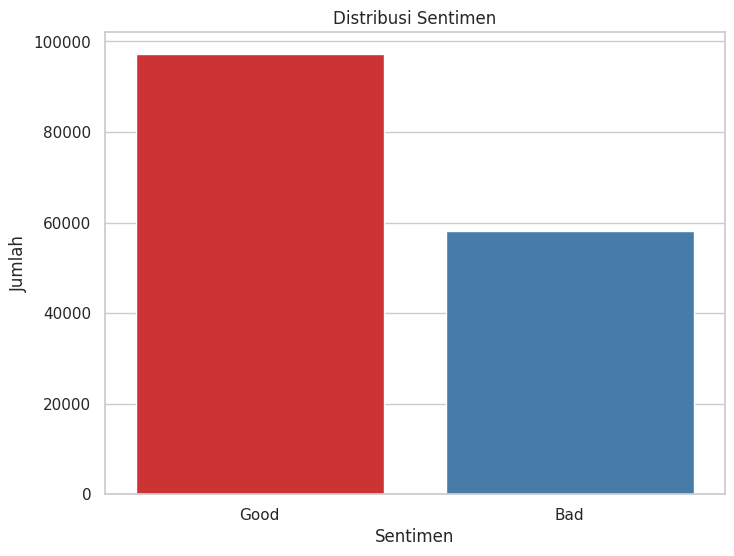

In [39]:
#melihat plot bar setiap jumlah Good dan Bad reviews
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_prepro, x='ratings', palette='Set1')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan plot bar ini, dapat dilihat bahwa dari keseluruhan dataset review, terdapat lebih banyak good reviews dibandingkan bad reviews. Walaupun dari perbandingan ini dapat dilihat bahwa jumlah bad reviews masih dapat dikatakan cukup banyak

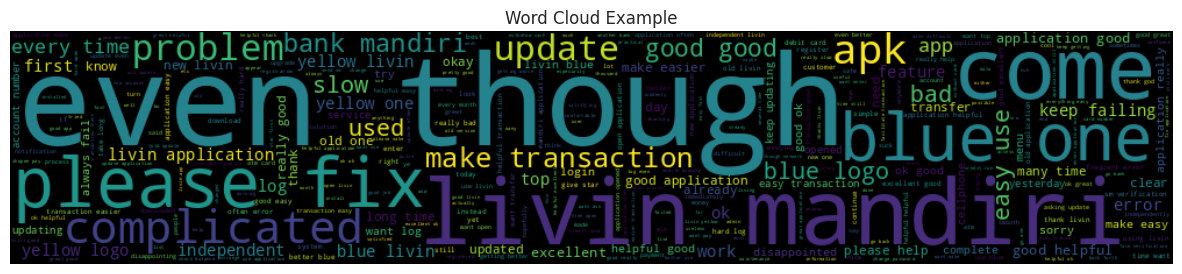

In [40]:
wordcloud = WordCloud(max_words=1500, width=1000, background_color='black').generate(" ".join(df_prepro['reviews']))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud Example")
plt.axis("off")
plt.show()

Berdasarkan plot image wordcloud ini, terlihat kata-kata yang paling banyak muncul di reviews. Di mana dari font kata yang terlihat besar yang mungkin bisa jadi point penting adalah kata update, blue, complicated, transaction. Di mana dari kata-kata ini mungkin dapat diasumsikan bahwa pengguna masih banyak yang membicarakan tentang update aplikasi livin dari yang berlogo biru ke logo terupdate yaitu kuning

In [41]:
#melihat dataframe dari nilai count kata
pd.DataFrame(wordcloud.words_.items()).head(20)

,0,1
0,even though,1.000000
1,livin mandiri,0.607299
2,come,0.535928
3,please fix,0.519457
4,blue one,0.474084
5,complicated,0.388180
6,apk,0.330212
7,problem,0.329889
8,update,0.310673
9,make transaction,0.306314


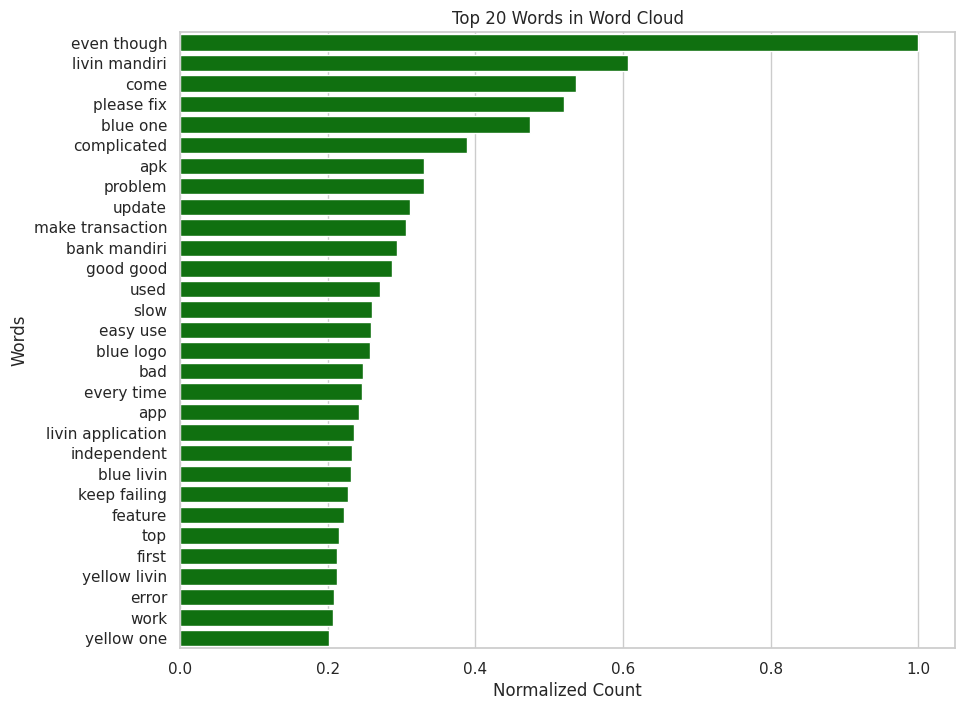

In [42]:
#melihat plot bar setiap count kata
x = []
y = []
for key,value in wordcloud.words_.items():
    x.append(key)
    y.append(value)
    if len(x) == 30:
        break
plt.figure(figsize=(10, 8))
sns.barplot(x=y, y=x, color='green')  # Membalik x dan y
plt.title("Top 20 Words in Word Cloud")
plt.xlabel("Normalized Count")
plt.ylabel("Words")
plt.show()

Pada plot bar ini, dapat dilihat lebih jelas kata-kata yang paling sering muncul dari jumlah countnya. Di mana dapat dilihat bahwa topik pembahasan dari keseluruhan review masih dalam hal update aplikasi, ada juga beberapa kata yang mungkin terkait performa aplikasi seperti error, slow, dan keep failing.

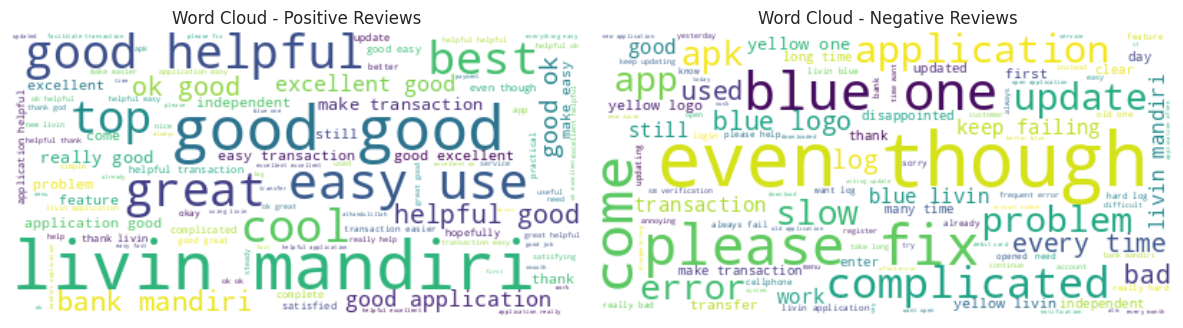

In [43]:
#melihat plot image wordcloud masing-masing setiap kelompok review dengan ratings Good dan Bad
positive_reviews = df_prepro[df_prepro['ratings'] == 'Good']['reviews']
negative_reviews = df_prepro[df_prepro['ratings'] == 'Bad']['reviews']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(max_words=100, background_color='white').generate(" ".join(positive_reviews))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(max_words=100, background_color='white').generate(" ".join(negative_reviews))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis("off")

plt.tight_layout()
plt.show()

Berdasarkan plot wordcloud di atas, dapat dilihat kata-kata positif yang sering muncul tidak terlalu banyak yang merupakan point-point penting yang bisa dievaluasi, namun bisa dilihat bahwa rata-rata merasa aplikasi terupdate sangat membantu dan mudah digunakan dalam transaksi.

Sedangkan pada review negatif dapat dilihat bahwa kata-kata negatif yans sering muncul banyak berbicara mengenai kesulitan adaptasi pengguna dari aplikasi lama berlogo biru ke aplikasi baru berlogo kuning , di mana rata-rata terlihat sulit menggunakan atau error di aplikasi terbaru.

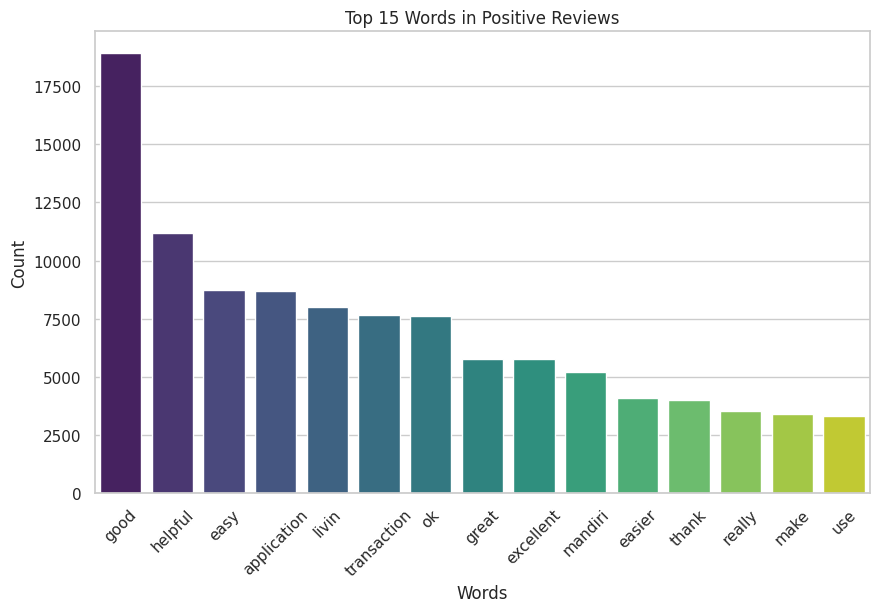

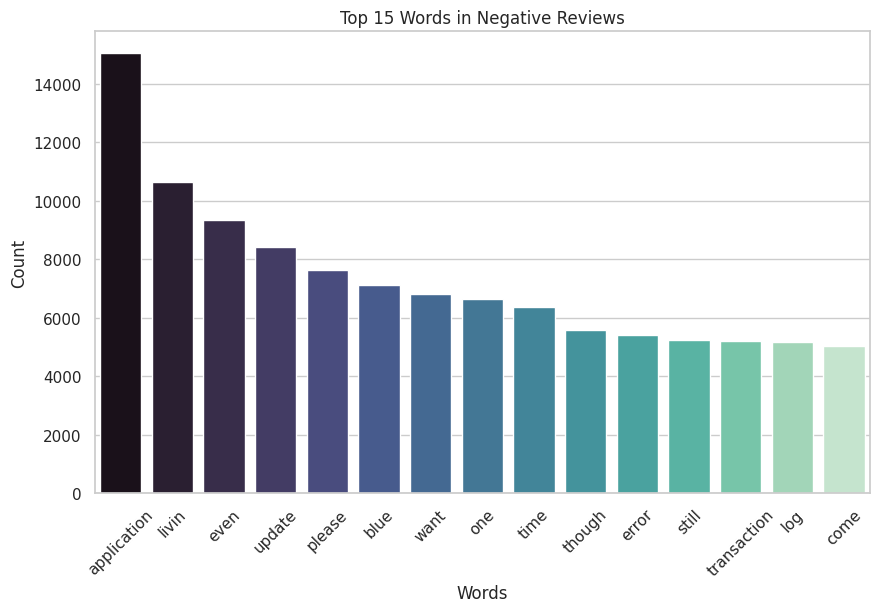

In [44]:
#melihat plot bar wordcloud masing-masing setiap kelompok review dengan ratings Good dan Bad
positive_words = " ".join(positive_reviews).split()
negative_words = " ".join(negative_reviews).split()

plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in Counter(positive_words).most_common(15)],
            y=[count for word, count in Counter(positive_words).most_common(15)],
            palette='viridis')
plt.title('Top 15 Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in Counter(negative_words).most_common(15)],
            y=[count for word, count in Counter(negative_words).most_common(15)],
            palette='mako')
plt.title('Top 15 Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Berdasarkan plot di atas, dapat terlihat lebih jelas bahwa pada kata-kata ratings good dan bad teradapat kata yang sama yaitu application dan transaction. Sehingga dapat diketahui bahwa transaksi disini tidak selalu berarti positif dan negatif, ada yang kesulitan melakukan transaksi dan ada yang mudah.

In [45]:
df_trans[df_trans['thumbs_up']== df_prepro.thumbs_up.max()][['reviews', 'thumbs_up', 'ratings', ]]

,reviews,thumbs_up,ratings
149475,"After I updated in early October, the livin ap...",2397,1


In [46]:
df[df['thumbs_up'] == df_prepro[df_prepro['ratings']== 'Good'].thumbs_up.max()][['review', 'thumbs_up', 'rating']]

,review,thumbs_up,rating
126466,"Saya nasabah kelas bawah, jd menurut saya lebi...",1481,5


Berdasarkan filtering di atas dapat dilihat jumlah thumbs up yang terbanyak untuk ratings yang Bad dan jumlah thumbs up terbanyak untuk kategori Good

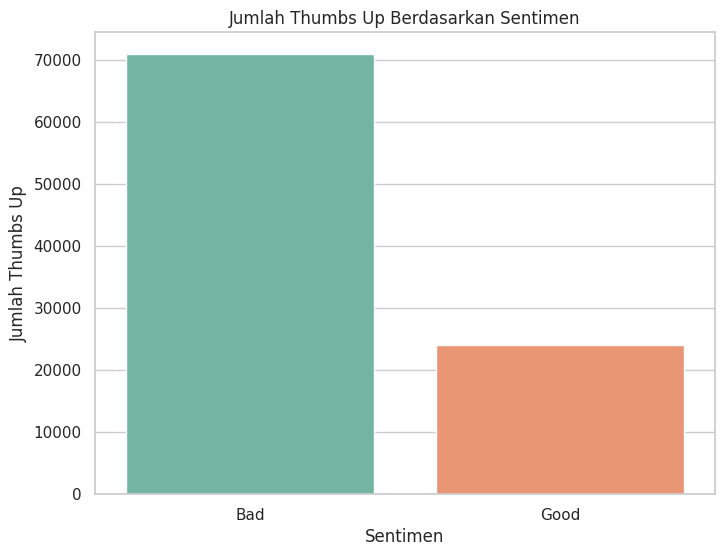

In [47]:
#korelasi antara ratings dan Thumbs Up
sentiment_thumbs_up = df_prepro.groupby('ratings')['thumbs_up'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_thumbs_up.index, y=sentiment_thumbs_up.values, palette='Set2')
plt.title('Jumlah Thumbs Up Berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Thumbs Up')
plt.show()


Berdasarkan plot bar di atas dapat dilihat bahwa review negatif cenderung dapat tanggapan dengan thumbs up yang lebih banyak dibandingkan review yang Good

<Axes: xlabel='word_sum', ylabel='thumbs_up'>

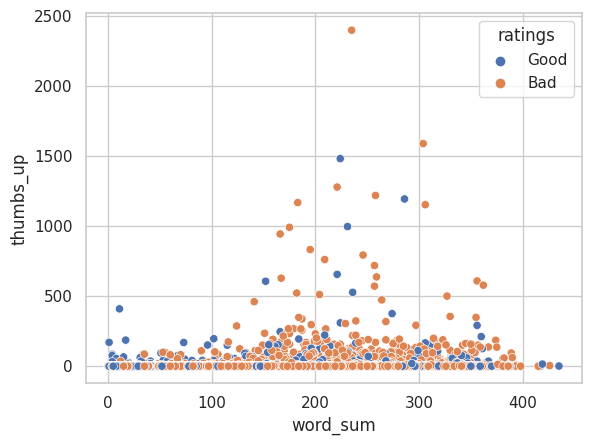

In [48]:
#melihat hubungan linear jumlah karakter kata dan thumbs_up
sns.scatterplot(data=df_prepro, x='word_sum', y='thumbs_up', hue='ratings')

Berdasarkan scatter plot di atas dapat dilihat tidak ada hubungan linear dari banyaknya jumlah karakter kata dan thumbs_up

# Modelling

Pada tahap ini saya melakukan training pada model neural network dengan LSTM. Di mana pada tahap ini saya melakukan 2 kali tuning untuk menemukan arsitektur dan parameter yang sesuai

In [158]:
#membuat fungsi untuk melakukan evaluasi dengan classification report dan confusion matrix
def evaluate(model, X_train_pro, X_test_pro, y_train, y_test):
    y_train_pred = model.predict(X_train_pro)
    y_test_pred = model.predict(X_test_pro)
    y_train_pred = y_train_pred.argmax(axis=1)
    y_test_pred = y_test_pred.argmax(axis=1)

    print("HASIL TRAINING: \n===============================")
    clf_report = (classification_report(y_train, y_train_pred))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"CONFUSION MATRIX :\n")
    sns.set_style("whitegrid", {'axes.grid' : False})
    cm = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    print("HASIL TESTING: \n===============================")
    clf_report = (classification_report(y_test, y_test_pred))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"CONFUSION MATRIX :\n")
    sns.set_style("whitegrid", {'axes.grid' : False})
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

## Label Encoding

In [49]:
#membuat kolom label berisi label 0 untuk Good dan 1 untuk Bad
df_prepro['label'] = df_prepro['ratings'].replace({'Good' : 0, 'Bad' : 1})
df_prepro

,reviews,ratings,thumbs_up,word_sum,label
0,tried cool responsive fresher look course,Good,36,41,0
1,excellent,Good,0,9,0
2,cool saucy really getting sophisticated truste...,Good,22,60,0
3,excellent,Good,0,9,0
4,excellent,Good,0,9,0
...,...,...,...,...,...
155187,great,Good,0,5,0
155188,since updated livin hard open every time click...,Bad,0,250,1
155189,atm card lost replace atm card via livin appli...,Good,0,52,0
155190,downloaded work,Bad,0,15,1


## Train-test split

In [50]:
#melakukan split data test, validasi, dan train.
X_train, X_test, y_train, y_test = train_test_split(df_prepro['reviews'], df_prepro['label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data uji:", len(X_test))


Jumlah data pelatihan: 93114
Jumlah data validasi: 31039
Jumlah data uji: 31039


In [51]:
y_val

9623      0
146529    1
105520    0
133451    0
10660     0
         ..
88568     1
63788     1
74644     0
39430     1
129059    0
Name: label, Length: 31039, dtype: int64

In [52]:
X_val

9623                                                   good
146529    pay akulaku application always fails never eve...
105520                                            excellent
133451    shame loyal customer livin pln transaction non...
10660          easy u independent livinby application thank
                                ...                        
88568     bi fast transfer money notified message succes...
63788     transaction yes maintenance application longer...
74644                                        cool practical
39430     topup transfer keep interrupting blue one yell...
129059                                           functional
Name: reviews, Length: 31039, dtype: object

In [53]:
print(type(y_train))
print(type(y_val))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [54]:
#mengubah tipe data label jadi numpy
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [55]:
print(type(y_train))
print(type(y_val))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [56]:
#melihat shape dataframe
X_train.shape

(93114,)

In [57]:
#melihat shape dataframe
y_train.shape

(93114,)

In [58]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

## Training

### Initial LSTM

In [60]:
max_words = 5000  #jumlah kata yang akan diikutsertakan dalam tokenizer
embedding_dim = 100  #dimensi embedding yang diinginkan
max_len = 100  #panjang maksimum tiap urutan kata dalam teks
lstm_units = 64  #jumlah unit LSTM_model1
num_classes = 2  #jumlah kelas (positif dan negatif)

In [61]:
#preprocessing teks (contoh: mengubah semua teks menjadi lowercase)
X_train_processed = [text_to_word_sequence(text.lower()) for text in X_train]
X_val_processed = [text_to_word_sequence(text.lower()) for text in X_val]
X_test_processed = [text_to_word_sequence(text.lower()) for text in X_test]

#hitung panjang maksimum teks setelah preprocessing
max_len = max(max(map(len, X_train_processed)), max(map(len, X_val_processed)), max(map(len, X_test_processed)))

#membuat tokenizer
tokenizer_model1 = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer_model1.fit_on_texts(X_train_processed)

#melakukan tokenisasi dan vektorisasi
X_train_sequences = tokenizer_model1.texts_to_sequences(X_train_processed)
X_val_sequences = tokenizer_model1.texts_to_sequences(X_val_processed)
X_test_sequences = tokenizer_model1.texts_to_sequences(X_test_processed)

#melakukan padding
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')


In [63]:
print("Dimensi X_train_padded:", X_train_padded.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi X_val_padded:", X_val_padded.shape)
print("Dimensi y_val:", y_val.shape)

print("Tipe data X_train_padded:", X_train_padded.dtype)
print("Tipe data y_train:", y_train.dtype)
print("Tipe data X_val_padded:", X_val_padded.dtype)
print("Tipe data y_val:", y_val.dtype)


Dimensi X_train_padded: (93114, 64)
Dimensi y_train: (93114,)
Dimensi X_val_padded: (31039, 64)
Dimensi y_val: (31039,)
Tipe data X_train_padded: int32
Tipe data y_train: int64
Tipe data X_val_padded: int32
Tipe data y_val: int64


In [66]:
#membuat arsitektur lstm pertama
model2 = Sequential()

model2.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

model2.add(LSTM(units=lstm_units, dropout=0.5, recurrent_dropout=0.5))

model2.add(Dropout(0.5))

model2.add(Dense(units=num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           500000    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 542,370
Trainable params: 542,370
Non-trainable params: 0
_________________________________________________________________


In [68]:
#melatih model dengan x_train dan x_val yang sudah dipadding dan tokenisasi
batch_size = 64
epochs = 30

history = model2.fit(X_train_padded, y_train,
                     validation_data=(X_val_padded, y_val),
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1)

Epoch 1/30
1455/1455 [==============================] - 333s 229ms/step - loss: 0.6625 - accuracy: 0.6247 - val_loss: 0.6601 - val_accuracy: 0.6279
Epoch 2/30
1455/1455 [==============================] - 331s 228ms/step - loss: 0.6623 - accuracy: 0.6247 - val_loss: 0.6601 - val_accuracy: 0.6279
Epoch 3/30
1455/1455 [==============================] - 368s 253ms/step - loss: 0.6621 - accuracy: 0.6247 - val_loss: 0.6601 - val_accuracy: 0.6279
Epoch 4/30
1455/1455 [==============================] - 296s 203ms/step - loss: 0.6619 - accuracy: 0.6247 - val_loss: 0.6603 - val_accuracy: 0.6279
Epoch 5/30
1455/1455 [==============================] - 283s 195ms/step - loss: 0.6619 - accuracy: 0.6247 - val_loss: 0.6602 - val_accuracy: 0.6279
Epoch 6/30
1455/1455 [==============================] - 252s 173ms/step - loss: 0.6619 - accuracy: 0.6247 - val_loss: 0.6601 - val_accuracy: 0.6279
Epoch 7/30
1455/1455 [==============================] - 257s 176ms/step - loss: 0.6619 - accuracy: 0.6247 - val_

In [74]:
len(history.history['accuracy'])

30

In [75]:
len(history.history['val_accuracy'])

30

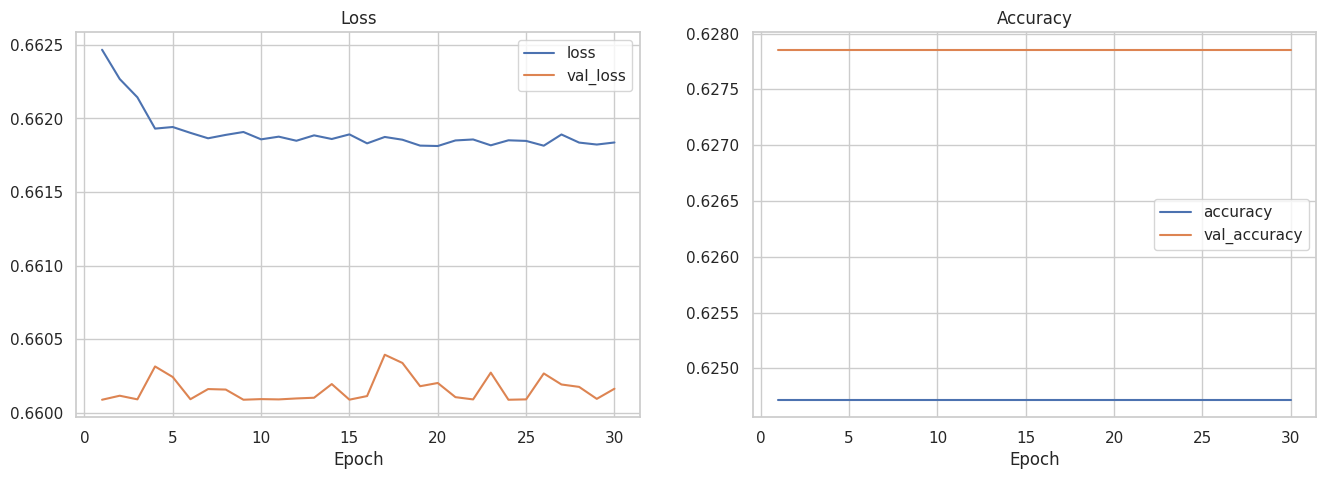

In [76]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

In [148]:
y_train_coba = model2.predict(X_train_padded)
y_test_coba = model2.predict(X_test_padded)

970/970 [==============================] - 18s 18ms/step


In [153]:
pd.DataFrame(y_train_coba)

,0,1
0,0.621933,0.378067
1,0.621933,0.378067
2,0.621933,0.378067
3,0.621933,0.378067
4,0.621933,0.378067
...,...,...
93109,0.621933,0.378067
93110,0.621933,0.378067
93111,0.621933,0.378067
93112,0.621932,0.378068


In [157]:
pd.DataFrame(y_test_coba.argmax(axis=1)).value_counts()

0    31039
dtype: int64

970/970 [==============================] - 18s 18ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77     58170
           1       0.00      0.00      0.00     34944

    accuracy                           0.62     93114
   macro avg       0.31      0.50      0.38     93114
weighted avg       0.39      0.62      0.48     93114

CONFUSION MATRIX :



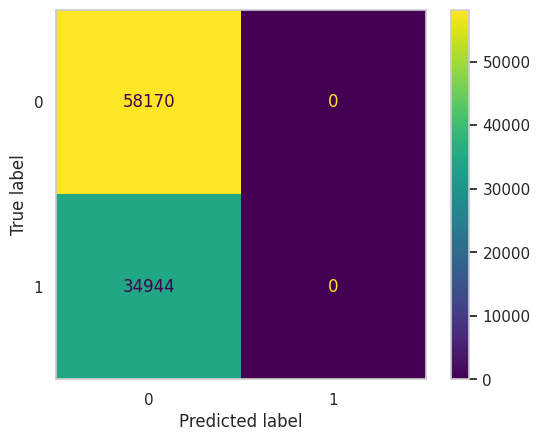

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     19508
           1       0.00      0.00      0.00     11531

    accuracy                           0.63     31039
   macro avg       0.31      0.50      0.39     31039
weighted avg       0.40      0.63      0.49     31039

CONFUSION MATRIX :



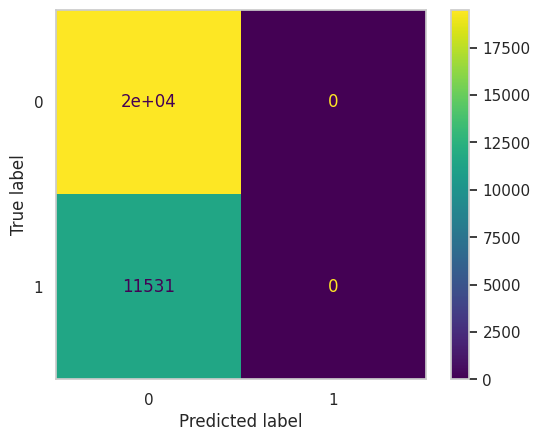

In [159]:
evaluate(model2, X_train_padded, X_test_padded, y_train, y_test)

### Tuned LSTM

In [102]:
#membuat set data vectorizer

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab : ", jml_vocab)
print("Panjang maksimum kalimat : ", max_sen_len, "kata")

Jumlah vocab :  15933
Panjang maksimum kalimat :  62 kata


In [116]:
#melakukan vectorizer pada data train
text_vectorization2 = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # Jika ingin menggunakan Sequential API
                                       )

text_vectorization2.adapt(X_train)

In [118]:
#mengubah Target ke dalam One Hot Encoding

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [104]:
#embedding
#understanding semantic relationships

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [109]:
X_train_vec

<93114x15933 sparse matrix of type '<class 'numpy.int64'>'
	with 490762 stored elements in Compressed Sparse Row format>

In [127]:
#membuat arsitektur model lstm2

tf.random.set_seed(25)

model_lstm2 = Sequential()
model_lstm2.add(text_vectorization2)
model_lstm2.add(embedding)
model_lstm2.add(LSTM(32, return_sequences=True))
model_lstm2.add(LSTM(32))
model_lstm2.add(Dense(2,activation='softmax'))

model_lstm2.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_11 (Text  (None, 62)               0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 62, 128)           2039424   
                                                                 
 lstm_14 (LSTM)              (None, 62, 32)            20608     
                                                                 
 lstm_15 (LSTM)              (None, 32)                8320      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,068,418
Trainable params: 2,068,418
Non-trainable params: 0
___________________________________________

In [128]:
#melakukan training model lstm2
model_lstm2_hist = model_lstm2.fit(X_train,
                         y_train_ohe,
                         epochs=30,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/30
2910/2910 [==============================] - 315s 107ms/step - loss: 0.3628 - accuracy: 0.8656 - val_loss: 0.3566 - val_accuracy: 0.8660
Epoch 2/30
2910/2910 [==============================] - 299s 103ms/step - loss: 0.3432 - accuracy: 0.8799 - val_loss: 0.3661 - val_accuracy: 0.8692
Epoch 3/30
2910/2910 [==============================] - 303s 104ms/step - loss: 0.3729 - accuracy: 0.8483 - val_loss: 0.3936 - val_accuracy: 0.8287
Epoch 4/30
2910/2910 [==============================] - 301s 104ms/step - loss: 0.3719 - accuracy: 0.8466 - val_loss: 0.3929 - val_accuracy: 0.8233
Epoch 5/30
2910/2910 [==============================] - 298s 102ms/step - loss: 0.3583 - accuracy: 0.8592 - val_loss: 0.3522 - val_accuracy: 0.8663
Epoch 6/30
2910/2910 [==============================] - 297s 102ms/step - loss: 0.3461 - accuracy: 0.8705 - val_loss: 0.3642 - val_accuracy: 0.8517
Epoch 7/30
2910/2910 [==============================] - 297s 102ms/step - loss: 0.3116 - accuracy: 0.8886 - val_

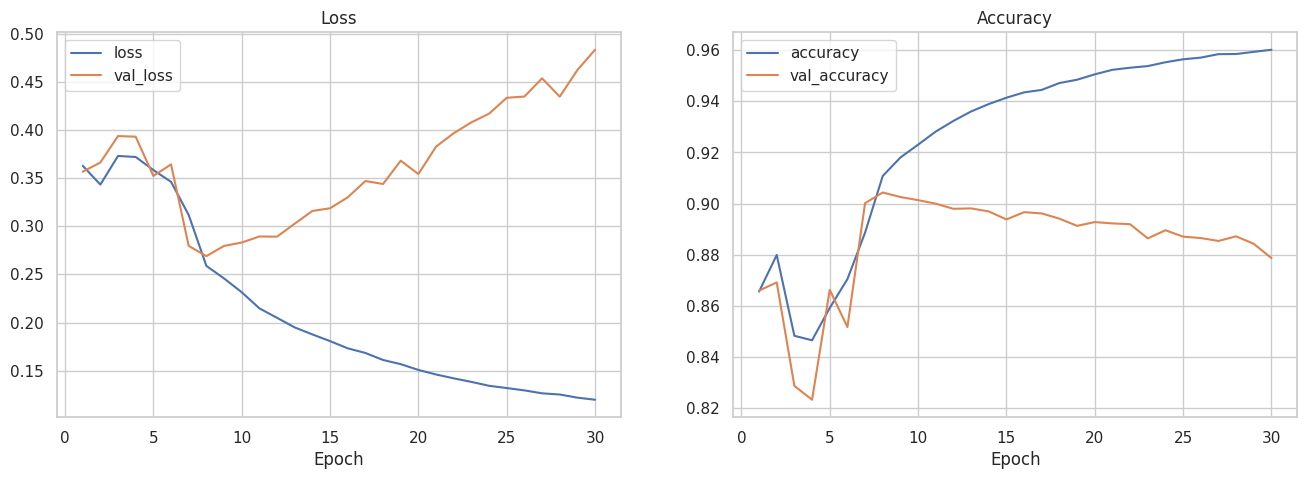

In [131]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_lstm2_hist.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_lstm2_hist.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),model_lstm2_hist.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_lstm2_hist.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

In [154]:
y_train_coba1 = model_lstm2.predict(X_train)
y_test_coba1 = model_lstm2.predict(X_test)

970/970 [==============================] - 19s 19ms/step


In [156]:
pd.DataFrame(y_test_coba1.argmax(axis=1)).value_counts()

1    30928
0      111
dtype: int64

970/970 [==============================] - 20s 21ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.21      0.00      0.00     58170
           1       0.37      0.99      0.54     34944

    accuracy                           0.37     93114
   macro avg       0.29      0.50      0.27     93114
weighted avg       0.27      0.37      0.21     93114

CONFUSION MATRIX :



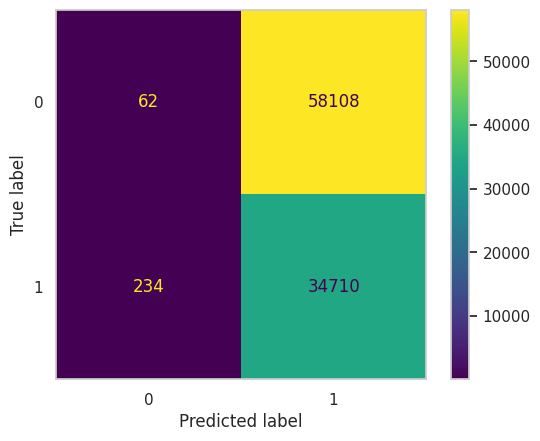

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.23      0.00      0.00     19508
           1       0.37      0.99      0.54     11531

    accuracy                           0.37     31039
   macro avg       0.30      0.50      0.27     31039
weighted avg       0.28      0.37      0.20     31039

CONFUSION MATRIX :



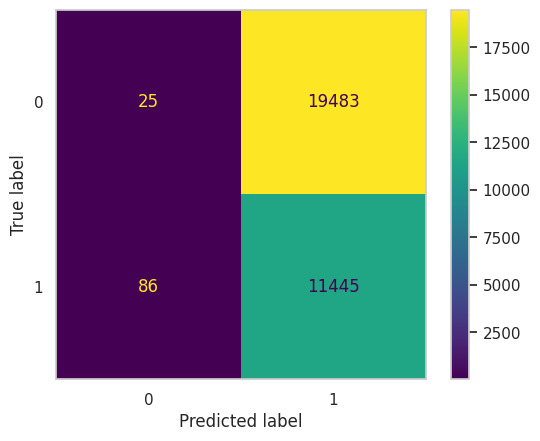

In [160]:
evaluate(model_lstm2, X_train, X_test, y_train, y_test)

### Tuned LSTM2

In [141]:
#membuat arsitektur model lstm3
model_lstm3 = Sequential()
model_lstm3.add(text_vectorization2)
model_lstm3.add(embedding)
model_lstm3.add(LSTM(32, return_sequences=True))
model_lstm3.add(Dropout(0.5))  # Penambahan dropout layer
model_lstm3.add(LSTM(32))
model_lstm3.add(Dropout(0.5))  # Penambahan dropout layer
model_lstm3.add(Dense(2, activation='softmax'))

model_lstm3.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_11 (Text  (None, 62)               0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 62, 128)           2039424   
                                                                 
 lstm_22 (LSTM)              (None, 62, 32)            20608     
                                                                 
 dropout_11 (Dropout)        (None, 62, 32)            0         
                                                                 
 lstm_23 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                     

In [142]:
model_lstm3_hist = model_lstm3.fit(X_train,
                         y_train_ohe,
                         epochs=30, batch_size=1024,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/30
91/91 [==============================] - 77s 794ms/step - loss: 0.6647 - accuracy: 0.6231 - val_loss: 0.6597 - val_accuracy: 0.6280
Epoch 2/30
91/91 [==============================] - 72s 789ms/step - loss: 0.4181 - accuracy: 0.8262 - val_loss: 0.3260 - val_accuracy: 0.8879
Epoch 3/30
91/91 [==============================] - 71s 779ms/step - loss: 0.3074 - accuracy: 0.9052 - val_loss: 0.3335 - val_accuracy: 0.8753
Epoch 4/30
91/91 [==============================] - 72s 794ms/step - loss: 0.3002 - accuracy: 0.8937 - val_loss: 0.3123 - val_accuracy: 0.8879
Epoch 5/30
91/91 [==============================] - 70s 773ms/step - loss: 0.2808 - accuracy: 0.9049 - val_loss: 0.3027 - val_accuracy: 0.8945
Epoch 6/30
91/91 [==============================] - 73s 807ms/step - loss: 0.2656 - accuracy: 0.9134 - val_loss: 0.2963 - val_accuracy: 0.8940
Epoch 7/30
91/91 [==============================] - 75s 827ms/step - loss: 0.2539 - accuracy: 0.9180 - val_loss: 0.2955 - val_accuracy: 0.8865

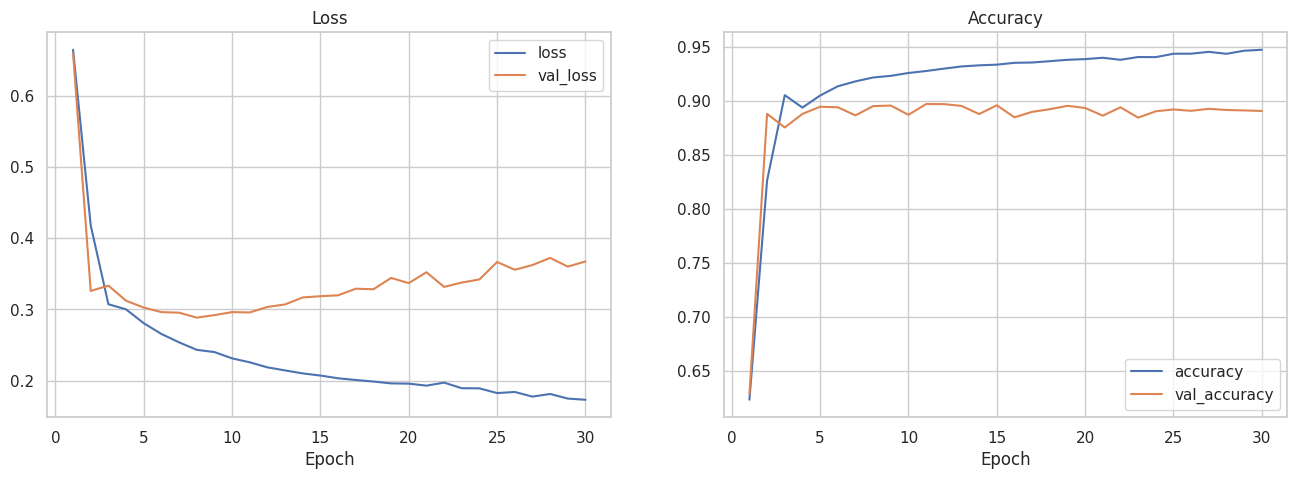

In [143]:
#membuat plot untuk mengevaluasi hasil loss dan accuracy
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_lstm3_hist.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_lstm3_hist.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')


ax[1].plot(range(1,epoch+1),model_lstm3_hist.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_lstm3_hist.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

In [139]:
X_train

23160     livin mandiri application extraordinary helpin...
18743                                                  good
10282                                 best helping business
114186                         livin update every time used
149860                          mine opened instead lagging
                                ...                        
44757     livin complete feature certain doubt jaya alwa...
37595                          hp oppo f6 install new livin
129283                         helpful easy application use
14532     used use livin mandiri blue come application s...
21727     update suggestion must come continue hard beg ...
Name: reviews, Length: 93114, dtype: object

970/970 [==============================] - 19s 20ms/step
HASIL TRAINING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     58170
           1       0.93      0.94      0.93     34944

    accuracy                           0.95     93114
   macro avg       0.95      0.95      0.95     93114
weighted avg       0.95      0.95      0.95     93114

CONFUSION MATRIX :



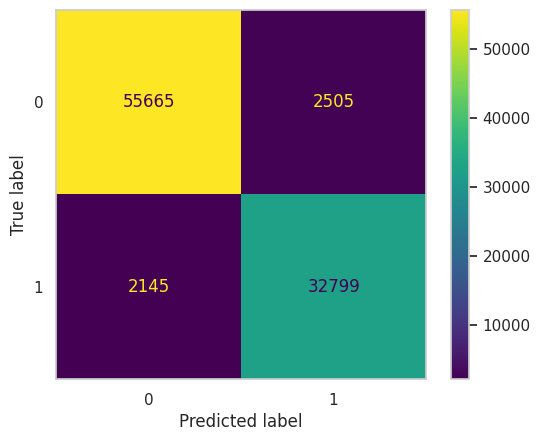

HASIL TESTING: 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     19508
           1       0.84      0.86      0.85     11531

    accuracy                           0.89     31039
   macro avg       0.88      0.88      0.88     31039
weighted avg       0.89      0.89      0.89     31039

CONFUSION MATRIX :



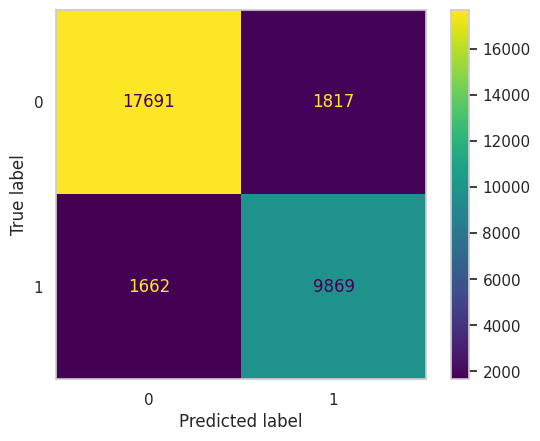

In [161]:
evaluate(model_lstm3, X_train, X_test, y_train, y_test)

Dari section ini, saya melakukan 3 tuning, dengan arsitektur sebagai berikut:

1. Saya merancang sebuah arsitektur menggunakan Keras Sequential API. Langkah pertama adalah menambahkan lapisan Embedding untuk menerjemahkan urutan kata menjadi vektor berdimensi rendah. Setelah itu, saya memasukkan lapisan LSTM dengan unit dan dropout yang telah ditentukan, berfungsi untuk mencegah overfitting pada model. Saya juga memasukkan lapisan dropout tambahan untuk penanganan yang lebih baik terhadap overfitting. Kemudian, lapisan Dense dengan aktivasi softmax digunakan untuk menghasilkan probabilitas prediksi kelas. Langkah terakhir adalah kompilasi model dengan optimizer RMSprop dan menggunakan loss function 'sparse_categorical_crossentropy'. Dengan arsitektur ini, model diharapkan dapat mengurangi loss selama pelatihan dan meningkatkan akurasi prediksi kelas.

2. Saya menggunakan Keras Sequential API untuk membuat model. Pertama, saya tambahkan lapisan text_vectorization2 yang telah saya definisikan sebelumnya untuk mengonversi teks menjadi vektor. Kemudian, saya tambahkan lapisan embedding untuk menerjemahkan urutan kata menjadi vektor dengan dimensi yang diinginkan. Lalu, saya masukkan dua lapisan LSTM berurutan. Lapisan pertama memiliki parameter return_sequences=True untuk keluaran berupa urutan yang diperlukan oleh lapisan LSTM berikutnya. Lapisan kedua LSTM mengambil keluaran lapisan sebelumnya dan menghasilkan output berdimensi 32. Akhirnya, lapisan Dense dengan aktivasi softmax digunakan untuk menghasilkan probabilitas prediksi kelas. Saya mengompilasi model dengan optimizer 'adam' dan menggunakan categorical_crossentropy sebagai fungsi loss untuk tugas klasifikasi multikelas. Dengan arsitektur ini, model diharapkan dapat belajar dari data dan menghasilkan prediksi kelas yang akurat.

3. Saya menggunakan Keras Sequential API untuk membuat model. Pertama, saya menambahkan lapisan text_vectorization2 yang telah saya definisikan sebelumnya untuk mengonversi teks menjadi vektor. Kemudian, saya menambahkan lapisan embedding untuk menerjemahkan urutan kata menjadi vektor dengan dimensi yang diinginkan. Setelah itu, saya memasukkan dua lapisan LSTM secara berurutan. Lapisan pertama memiliki parameter return_sequences=True untuk menghasilkan keluaran yang diperlukan oleh lapisan LSTM berikutnya. Saya juga menambahkan lapisan dropout dengan tingkat dropout 0.5 untuk mengurangi overfitting. Kemudian, saya menambahkan lapisan LSTM kedua yang mengambil keluaran lapisan sebelumnya dan menghasilkan output berdimensi 32. Saya kembali menambahkan lapisan dropout untuk mengurangi overfitting. Akhirnya, saya menambahkan lapisan Dense dengan aktivasi softmax untuk menghasilkan probabilitas prediksi kelas. Saya mengompilasi model dengan optimizer 'adam' dan menggunakan categorical_crossentropy sebagai fungsi loss untuk tugas klasifikasi multikelas. Dengan arsitektur ini, model diharapkan dapat belajar dengan baik dari data dan menghasilkan prediksi yang lebih baik dengan mengurangi risiko overfitting.

# Model Evaluation

Berikut adalah hasil evaluasi setiap arsitektur model yang saya lakukan di atas:

* Pada hasil training di atas, di arsitektur sequential pertama model saya menghasilkan model yang masih underfit. Di mana ditemukan bahwa hasil val_accuracy hanya berada di angka 0.6279.

* Pada arsitektur sequential kedua saya menemukan bahwa pada perbandingan val_accuracy dan train accuracy masih overfit. Selain itu nilai val_accuracy juga terus menurun walaupun sudah sampai 30 epoch. Sehingga pada hasil evaluasi dengan data test ditemukan hasil accuracy hanya 0.37%, dibandingkan dengan hasil val_accuracy yang menunjukkan 0.87% sampai epoch 30.

* Sementara pada arsitektur sequential ketiga saya menemukan bahwa perbandingan val_accuracy dan train accuracy masih overfit sampai epoch 30. Namun terlihat bahwa hasil val_accuracy tersebut sudah stabil di angka 88% rata-rata. Kemudian ketika dilakukan pengujian ke data test, ditemukan hasil accuracy yang baik, yaitu di angka 89%.

Untuk melakukan evaluasi model ini, saya fokus pada nilai **acccuracy**  model, yang merupakan penilaian mengenai seberapa sedikit SEMUA nilai FALSE yang dihasilkan oleh model. Di mana pada kasus ini saya mendefinisikan **Good sebagai nilai positive** dan **Bad sebagai nilai negative**. Berikut adalah hasil evaluasi untuk setiap model saya:

Sequential dengan tokenizer
* Nilai accuracy 0.62 di training, dan 0.63 di test
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi true positive 20000, false positive 11531, true negative 0, false negative 0.

Berdasarkan ini, terlihat model tidak dapat mengenal kategori negative sama sekali di data test

Sequential dengan vectorizer
* Nilai accuracy 0.37 di training, dan 0.37 di test
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi true positive 25, false positive 86, true negative 11445, false negative 19483.

Berdasarkan hal ini, terlihat bahwa model lebih mudah mengenali kategori negative dari pada positive, namun sudah mulai dapat mengenali keduanya dibandingkan arsitektur pertama.

Sequential dengan vectorizer dan penambahan dropout dan batch
* Nilai accuracy 0.95 di training, dan 0.89 di test
* Pada dataset test, confusion matrix memperlihatkan model berhasil memprediksi true positive 17691, false positive 1662, true negative 9869, false negative 1817

Berdasarkan evaluasi ini, terlihat bahwa model ketiga ini dapat mengenali dan memprediksi dengan baik kedua kategori.
Dengan demikian, pada kasus ini saya menggunakan model lstm hasil tunig dengan vectorizer dan penambahan dropout serta batch.

# Model Saving

In [163]:
#menyimpan model
pickle.dump(model_lstm3, open('livin_app_review_pred.pkl', 'wb'))

# Model Inference

In [170]:
def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    nltk.download('punkt')
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = " ".join([word for word in words if word.lower() not in stop_words])

    nltk.download('wordnet')
    lemmat = WordNetLemmatizer()
    text = " ".join(lemmat.lemmatize(word) for word in text.split())

    return text

In [176]:
teks = "i love the app for daily transaction"
# Preprocess the text
preprocessed_teks = preprocess_text(teks)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [177]:
prediction = model_lstm3.predict(pd.Series(preprocessed_teks))
print(prediction)
prediction.argmax(axis=1)

1/1 [==============================] - 0s 31ms/step
[[0.9785476  0.02145239]]


array([0])

In [178]:
prediction = model_lstm3.predict(pd.Series(preprocessed_teks))
prediction_labels = ["Good" if pred[0] > 0.5 else "Bad" for pred in prediction]

print(prediction_labels)

1/1 [==============================] - 0s 50ms/step
['Good']


# Kesimpulan, Kelemahan & Kelebihan, dan Pengembangan

**Kesimpulan:**

Berdasarkan evaluasi tiga arsitektur model yang diujikan, dapat disimpulkan bahwa arsitektur ketiga dengan vectorizer, penambahan dropout, dan batch merupakan pilihan terbaik. Model ini mencapai akurasi yang baik pada data testing (89%), mampu mengenali dan memprediksi dengan baik kedua kategori (positif dan negatif), serta mengatasi masalah underfitting dan overfitting yang ditemukan pada arsitektur sebelumnya. Dengan demikian, model ini layak digunakan untuk prediksi review aplikasi perbankan dan memiliki potensi untuk memberikan wawasan berharga dalam menganalisis sentimen pengguna.

**Saran Bisnis:**

Berikut adalah saran bagi bank jika ingin menggunakan model ini, dan juga beberapa saran bisnis yang mungkin dapat menjadi informasi bagi pihak perusahaan berdasarkan hasil eksplorasi data review ini:

1. **Analisis Sentimen Review**: Model yang dikembangkan dapat diimplementasikan untuk menganalisis sentimen dari review pelanggan terhadap layanan perbankan. Dengan demikian, perusahaan dapat dengan cepat mengidentifikasi ulasan negatif dan positif serta mengukur sejauh mana kepuasan pelanggan. Langkah ini akan memberikan wawasan berharga yang dapat digunakan untuk meningkatkan layanan yang kurang memuaskan dan mempertahankan keunggulan yang diakui.

2. **Prioritas Perbaikan Aplikasi**: Berdasarkan kata-kata yang sering muncul dalam ulasan, perusahaan dapat menentukan fitur atau area yang paling membutuhkan perbaikan. Ini memungkinkan perusahaan untuk mengarahkan sumber daya dan upaya dalam pengembangan aplikasi pada aspek yang paling penting bagi pengguna. Peningkatan pengalaman pengguna secara spesifik akan menghasilkan kepuasan yang lebih tinggi dan meningkatkan daya tarik aplikasi.

3. **Tanggapan Terhadap Ulasan**: Melalui analisis ulasan, perusahaan dapat merumuskan respons yang lebih kontekstual dan solutif terhadap ulasan negatif. Tanggapan yang aktif dan transparan terhadap masalah yang diungkapkan pengguna dapat memperbaiki persepsi dan meningkatkan kepercayaan pelanggan. Hal ini juga dapat memperlihatkan komitmen perusahaan dalam mengatasi masalah dengan segera dan efektif.

4. **Pengembangan Konten Edukatif**: Dengan memahami kata-kata yang muncul dalam review, perusahaan dapat mengidentifikasi area di mana pengguna membutuhkan informasi lebih lanjut atau bantuan. Pengembangan konten edukatif, seperti panduan atau tutorial, dapat membantu pengguna dalam mengatasi hambatan yang dihadapi dan meningkatkan penggunaan aplikasi secara efektif.

5. **Inovasi Berbasis Ulasan**: Penggunaan analisis ulasan dapat menjadi sumber inspirasi untuk inovasi produk atau layanan baru. Menangkap masukan dan saran dari pengguna dapat membantu perusahaan dalam mengembangkan fitur baru yang sesuai dengan kebutuhan mereka. Dengan demikian, perusahaan dapat terus beradaptasi dengan harapan dan keinginan pelanggan.

**Pengembangan Model**:

Berikut adalah hal-hal yang dapat membantu untuk pengembangan model pada kasus ini:

* Ekstraksi Fitur Lebih Mendalam: Pengembangan lebih lanjut pada tahap ekstraksi fitur bisa dilakukan. Penggunaan metode seperti TF-IDF atau Word2Vec dapat membantu dalam mengambil makna dan hubungan antar kata yang lebih kompleks, yang dapat meningkatkan representasi teks dalam model. Ini mungkin membantu dalam mengatasi masalah yang muncul pada model yang mengalami underfitting atau overfitting.

* Pemodelan Bahasa yang Lebih Canggih: Menggunakan model bahasa yang lebih canggih seperti BERT atau GPT-3 dapat membantu dalam meningkatkan kualitas prediksi. Model-model ini telah terbukti sangat efektif dalam memahami konteks dan nuansa dalam teks, yang dapat memperbaiki hasil prediksi kualitas review.

* Balanced Target: Dataset ulasan ini memiliki ketidakseimbangan antara kategori positif dan negatif. Menggunakan teknik seperti oversampling atau undersampling untuk meratakan jumlah sampel dari setiap kategori dapat meningkatkan kemampuan model dalam mengenali dan memprediksi kategori yang kurang umum.

* Pendekatan Ensemble: Menggabungkan beberapa model dengan pendekatan ensemble dapat membantu dalam meningkatkan performa prediksi. Pendekatan ini menggabungkan prediksi dari beberapa model untuk menghasilkan hasil yang lebih kuat dan stabil.


* Uji Coba dengan Dataset Lain: Model-model yang dikembangkan sebaiknya diuji coba dengan dataset yang berbeda, terutama jika dataset yang digunakan saat ini memiliki karakteristik khusus. Ini dapat membantu dalam memahami generalisasi model dan seberapa baik kinerjanya pada situasi yang berbeda.